# Project 2

## Authors: Declan Sheehan, Jack Stoetzel

### Description: In this project, we will create two machine learning algorithms and apply it toward one of the datasets in project 1.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import operator
from numpy import *

# Import data from csv file. CSV file: 10 Columns x 35157 Rows.
COVID = pd.read_csv('full_grouped.csv', skiprows=[0], header = None, skipinitialspace = True,
                names = ['date', 'count_reg', 'case', 'death', 'recover', 'active', 'ncase', 'ndeath', 'nrecover', 'who'])


The country's Covid-19 status is: Good


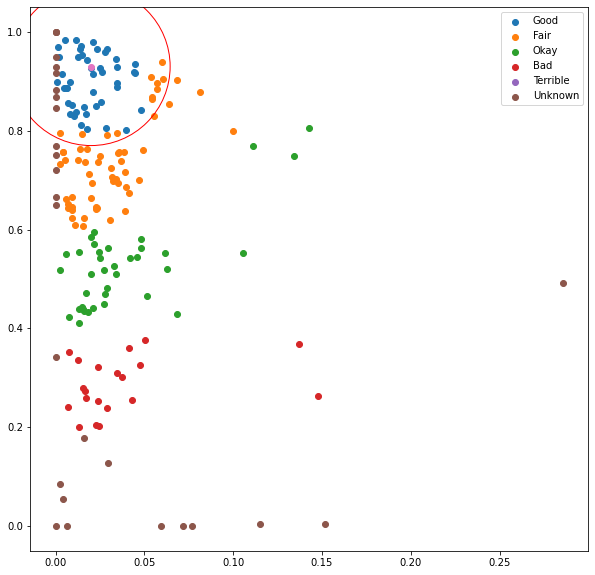

In [2]:
# Altered class from Lab 06 to calculate the k-Nearest-Neighbor.
class kNN:
    def __init__(self, train_data, full_data, labels, k):
        super().__init__()
        self.k = k
        self.labels = labels
        self.distance = None
        self.train(train_data, full_data)
        
    def train(self, train_data, full_data):
        self.full_data = full_data
        self.train_data = train_data
        self.train_size = train_data.shape[0]
        
    def distances(self, sample):
        diffMatrix = tile(sample, (self.train_size, 1)) - self.train_data
        self.distance = ((diffMatrix ** 2).sum(axis = 1) ** 0.5)

    def predict(self, sample):
        self.distances(sample)
        sortedIndices = self.distance.argsort()
        
        label_count = []
        for i in range(len(self.labels)):
            label_count.append(0)
        
        Class = ''
        for num in range(self.k):
            votedPoints = sortedIndices[num]
            for label in self.labels:
                if self.full_data[votedPoints][2] == label:
                    label_count[self.labels.index(label)] += 1
                
        values = array(label_count).argsort()
        Class = self.labels[values[len(self.labels)-1]]
        
        return Class
    
    def print_plot(self, sample):
        plots = []
        ax = ''
        for i in range(len(self.labels)):
            plots.append(([], []))
        
        for num in range(self.train_size):
            plots[self.labels.index(self.full_data[num][2])][0].append(self.train_data[num][0])
            plots[self.labels.index(self.full_data[num][2])][1].append(self.train_data[num][1])
                
        plt.figure(figsize=(10, 10))
        for sett in plots:
            ax = plt.scatter(sett[0], sett[1])
            
        plt.scatter(sample[0], sample[1])
        plt.scatter(sample[0], sample[1], s=25000, facecolors='none', edgecolors='r')
        plt.legend(self.labels)
        plt.show()

################################################################

# Calculate 'death rates' and 'recovery rates' for each country to classify them.
Recovery = COVID[['count-reg', 'case', 'death', 'recover']].groupby(['count-reg']).max().sort_values(['count-reg'], ascending=True)
Recovery['recoverratio'] = Recovery['recover'] / Recovery['case']
Recovery['deathratio'] = Recovery['death'] / Recovery['case']
Recovery = pd.DataFrame(dict(dr=Recovery['deathratio'], rr=Recovery['recoverratio'], country=Recovery.index))

# Set up the data by giving them labels based on above rates.
full_data = []
train_data = []
for num in range(len(Recovery)):
    full_data.append([Recovery['dr'][num], Recovery['rr'][num]])
    train_data.append([Recovery['dr'][num], Recovery['rr'][num]])
    
# Assigning covid-19 status.
for point in full_data:
    if point[0] == 0.00 or point[1] == 0.00:
        point.append('Unknown')
    elif point[0] <= 0.05 and point[1] >= 0.80:
        point.append('Good')
    elif point[0] <= 0.10 and point[1] >= 0.60:
        point.append('Fair')
    elif point[0] <= 0.15 and point[1] >= 0.40:
        point.append('Okay')
    elif point[0] <= 0.20 and point[1] >= 0.20:
        point.append('Bad')
    elif point[0] >= 0.20 and point[1] <= 0.20:
        point.append('Terrible')
    else:
        point.append('Unknown')
        
# Run the model and make predictions.
test_data = [[0.03, 0.72], [0.02, 0.93], [0.08, 0.25]]
model = kNN(array(train_data), array(full_data), ['Good', 'Fair', 'Okay', 'Bad', 'Terrible', 'Unknown'], 5)
print('The country\'s Covid-19 status is:', model.predict(array(test_data[1])))
model.print_plot(array(test_data[1]))


In [2]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
COVID['CODE']=alpha3code(COVID.count_reg)
COVID.head()

,date,count_reg,case,death,recover,active,ncase,ndeath,nrecover,who,CODE
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


In [5]:
# import pip
# pip.main(['install', 'geopandas'])
import geopandas 
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()

OSError: Could not find lib c or load any of its variants [].

In [4]:
# plot confirmed cases world map 
merge.plot(column='Confirmed_Cases', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.Confirmed_Cases[i]),size=10)
plt.show()

NameError: name 'merge' is not defined